# CAP 5610 - Introduction to Machine Learning <br>Florida International University - Fall 2018
## Example Set #2 - Linear Regression

Here, we're using sklearn's [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) function to generate a regression dataset that will be used to solve the problems below.

82.1903908407869


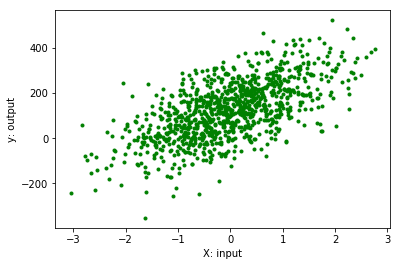

In [593]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

# number of samples to generate
n_samples = 1000

# generate the dataset
X, y, coef = datasets.make_regression(n_samples=n_samples,
                                      n_features=1,
                                      n_informative=1,
                                      bias=125,
                                      noise=100,
                                      coef=True,
                                      random_state=0)

# plot the dataset
plt.scatter(X, y, color='green', marker='.',
            label='Regression Data')
plt.xlabel('X: input')
plt.ylabel('y: output')
print(coef)

### Problem 1 - Linear Regression with Batch Gradient Descent

Implement the batch gradient descent algorithm and apply it to the generated dataset.

In [594]:
def lms_loss(h, y):
    return 0.5*np.sum((y - h)**2)


def batch_gradient_descent(X, y, alpha=1e-4, max_iterations=1000):
    #get input shape
    input_shape=X.shape
    
    #initialize weights
    theta = np.ones(2)
#     theta = np.random.rand(2)*100
    
    #add constant column to X to take advantage of numpy matrix mult
    X = np.append(X, np.ones(input_shape),1)
    
    cost = []
    
    #update weights iteratively until max iterations or convergence
    for i in range(max_iterations):
        h = np.dot(X, theta)
        cost.append(lms_loss(h, y))
        if i > 1 and abs(cost[i] - cost[i - 1]) < 10.0:
                break
        theta = theta + alpha * np.dot(X.transpose(),y-h)
        
    #compute predictions for learned weights
    predictions = np.dot(X, theta)
    
    return theta, predictions, cost

weights, predictions, cost1 = batch_gradient_descent(X, y)
weights

array([ 81.41140813, 127.37629753])

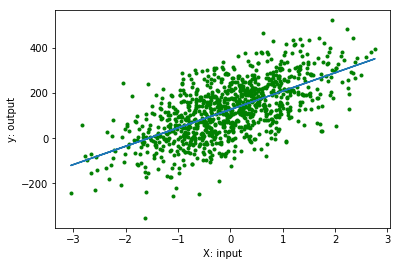

In [595]:
plt.scatter(X, y, color='green', marker='.',
            label='Regression Data')
plt.xlabel('X: input')
plt.ylabel('y: output')
plt.plot(X, predictions)

Text(0,0.5,'MSE')

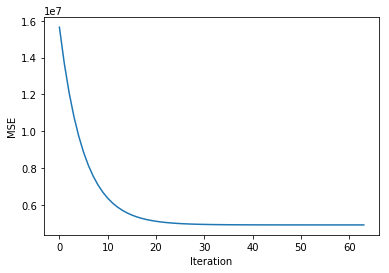

In [596]:
plt.plot(cost1)
plt.xlabel('Iteration')
plt.ylabel('MSE')

### Problem 2 - Linear Regression with Stochastic Gradient Descent
Modify your implementation of batch gradient descent to create the stochastic gradient descent algorithm and apply it to the generated dataset.

In [597]:
def stochastic_gradient_descent(X, y, alpha=1e-4, max_iterations=1000):
    #get input shape
    input_shape=X.shape
    
    #get number of samples
    m = input_shape[0]
    
    #initialize weights
    theta = np.ones(2)
#     theta = np.random.rand(2)*100
    
    #add constant column to X to take advantage of numpy matrix mult
    X = np.append(X, np.ones(input_shape),1)
    
    cost = []
    
    #update weights iteratively until max iterations
    for i in range(max_iterations):
        h = np.dot(X, theta)
        cost.append(lms_loss(h, y))
        if i > 1 and abs(cost[i] - cost[i - 1]) < 10.0:
                break
        for i in range(m):
            theta = theta + alpha * (y[i] - h[i])*X[i]
        
    #compute predictions for learned weights
    predictions = np.dot(X, theta)
    
    return theta, predictions, cost

def shuffle_in_unison(a, b):
     n_elem = a.shape[0]
     indeces = np.random.permutation(n_elem)
     return a[indeces], b[indeces]

X, y = shuffle_in_unison(X, y)
weights, predictions, cost2 = stochastic_gradient_descent(X, y)
weights

array([ 81.41140813, 127.37629753])

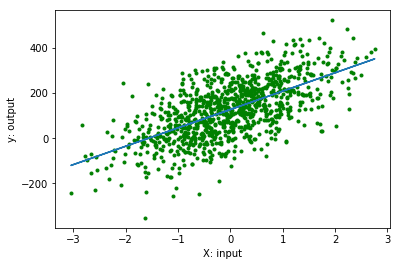

In [598]:
plt.scatter(X, y, color='green', marker='.',
            label='Regression Data')
plt.xlabel('X: input')
plt.ylabel('y: output')
plt.plot(X, predictions)

Text(0,0.5,'MSE')

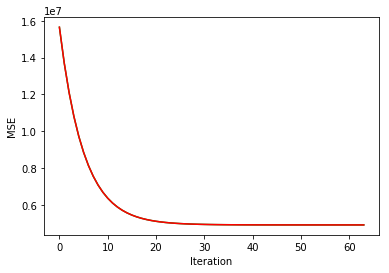

In [599]:
plt.plot(cost1, 'g')
plt.plot(cost2, 'r')
plt.xlabel('Iteration')
plt.ylabel('MSE')